<a href="https://colab.research.google.com/github/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal/blob/main/Trabajo%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

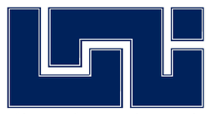

</center>


<center><h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks</center>

[UNI-DEPEC](https://posgrado.uni.edu.ni)

**Estudiantes:** 

*   Marvin López Osorio
*   Eduardo Rivera

# **Trabajo Final**
## **Modelo de Clasificación: Análisis y desarrollo de modelo de clasificación de no aprobación de estudiantes de primer ciclo universitario utilizando Python**
Se desarrolló un modelo de aprendizaje automático de tipo clasificación para predecir el resultado de aprobación de estudiantes en el primer ciclo universitario. 

El estudio se basó en un conjunto de datos generales, encuestas de hábitos de estudio y resultados de análisis psicopedagógicos de los estudiantes del primer ciclo de carreras de ingeniería en una universidad de El Salvador. 

Se confirmaron hipótesis respecto a las relaciones entre las variables involucradas, y a la vez se encontraron correspondencias no previstas entre las variables de estudio.

Se creo un [repositorio en GitHub](https://github.com/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal) donde se almacena la base de datos y el presente cuaderno para consultas futuras.

## **Objetivo**
Predecir si un estudiante reprobará el primer ciclo universitario mediante un modelo de clasificación basado en variables psicopedagógicas, conductuales (malos hábitos) y generales.

## **Antecedentes**
Una universidad de El Salvador desde el año 2013 se planteó el problema de cómo dar acompañamiento a los estudiantes con el objetivo de reducir la deserción en los primeros años de carreras universitarias.


Con la cantidad de estudiantes cercana a siete mil, en el año 2013, se tomaron algunas decisiones:
*   Aplicar una prueba psicométrica para identificar aptitudes y hábitos en los estudiantes de nuevo ingreso.
*   Crear departamento de psicopedagogía que aplicara la prueba y apoyara a los estudiantes, aconsejándoles con base en sus aptitudes.
*   Crear programas de apoyo a los estudiantes para mejorar sus aptitudes.

En base a lo anterior, se creó en el 2014 el departamento 
de psicopedagogía y a partir del 2015 se empezó a aplicar dicha prueba para iniciar una base de datos que sirviera de insumo para crear los programas de apoyo a estudiantes de la universidad.

En 2016, se inició a trabajar en la posibilidad de identificar a los estudiantes que necesitaran mayor orientación para seleccionar la carrera que cursarían y tener éxito en la misma. A partir esta iniciativa, se tomarían decisiones de creación de programas de apoyo y orientación estudiantil para reducir la tasa de deserción que en ese año rondó el 20%.

Se obtuvo de parte del departamento de psicopedagogía una base de datos que contiene datos de 41 carreras, con ingresos de estudiantes entre 2017 y 2021 y las variables psicopedagógicas relevantes.

##**Desarrollo**

###****Carga de librerías necesarias****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###****Carga de datos****

In [2]:
#Referencias al archivo en repositorio de origen y carga de datos
repo = 'https://github.com/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal/blob/main/Base%20de%20Datos%20Universidad.xlsx?raw=True'
datos = pd.read_excel(repo)
datos.head(3)

,Ingreso,Estado,Sexo,Municipio,Edad,Paes,Carrera,Facultad,Segunda carrera,CUM,Porcentaje de avance,Estado actual,Razonamiento Verbal (DAT- VR),Relaciones Espaciales (DAT - SR),Razonamiento Abstracto (DAT- AR),Aptitud Numérica (DAT - NA),Razonamiento Mecánico (DAT-MR),Rapidez y precisión perceptiva (DAT -CSA),Hábitos,Aprobación,tipo institución
0,2017,ACTIVO,Femenino,Soyapango,23,5.52,Licenciatura en Idiomas con especialidad en la...,Facultad de CC. y Humanidades,NaN,8.4,77.14,ACTIVO,75,15,20,5,45,5,5,Aprobado,Privado
1,2017,ACTIVO,Femenino,Soyapango,23,4.50,Licenciatura en Ciencias de la Comunicación,Facultad de CC. y Humanidades,NaN,8.6,94.00,ACTIVO,75,20,15,50,15,5,1,Aprobado,Privado
2,2017,ACTIVO,Femenino,Soyapango,24,3.83,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,NaN,7.6,79.41,ACTIVO,45,5,10,30,15,5,4,Aprobado,Público


###****Descripción y limpieza de datos****
El dataset original contiene las siguientes variables:

*   Ingreso, 
*   Estado,
*   Sexo, 
*   Municipio, 
*   Edad, 
*   Paes, 
*   Carrera,
*   Facultad, 
*   Segunda carrera, 
*   CUM, 
*   Porcentaje de avance,
*   Estado actual, 
*   Razonamiento Verbal (DAT- VR),
*   Relaciones Espaciales (DAT - SR), 
*   Razonamiento Abstracto (DAT- AR),
*   Aptitud Numérica (DAT - NA), 
*   Razonamiento Mecánico (DAT-MR),
*   Rapidez y precisión perceptiva (DAT -CSA), 
*   Hábitos, 
*   Aprobación,
*   Tipo institución

Se realizaron cambios a los nombres para que facilitar el manejo del dataset.


In [3]:
#Definir etiquetas de columnas
Columnas = ['Ingreso', 'Estado', 'Sexo', 'Municipio', 'Edad', 'Paes', 'Carrera', 'Facultad', 'Segunda_carrera', 'CUM', 'Avance', 
            'Estado_actual', 'DAT_VR', 'DAT_SR', 'DAT_AR', 'DAT_NA', 'DAT_MR', 'DAT_CSA', 'Hábitos', 'Aprobacion', 'Institucion']

#Cambiar etiquetas de columnas
datos.columns = Columnas

#Verificar datos vacios
datos.isna().sum().sort_values(ascending=False) 

Segunda_carrera    5200
Institucion           0
CUM                   0
Estado                0
Sexo                  0
Municipio             0
Edad                  0
Paes                  0
Carrera               0
Facultad              0
Avance                0
Aprobacion            0
Estado_actual         0
DAT_VR                0
DAT_SR                0
DAT_AR                0
DAT_NA                0
DAT_MR                0
DAT_CSA               0
Hábitos               0
Ingreso               0
dtype: int64

El problema de estudio puede ser abordado como una regresión sobre la variable 'CUM', o como clasificación sobre la variable 'Aprobacion'. En este caso se consideró conveniente realizar clasificación sobre 'Aprobacion', ya que el objetivo principal de la institución es identificar aquellos estudiantes que puedan tener deficiencias, y buscar corregirlas, independientemente de la nota que puedan obtener.

Existe una variable llamada "Segunda carrera", la cuál no es relevante, ya que la mayoría de los estudiantes no completan esta parte, y además, se identifico que la mayoría de las observaciones (5200) tienen valor ausente. 

Por otro lado las variables: Estado, Estado_actual, CUM y Avance, no son relevantes para la predicción, ya que son indicadores para la universidad para identificar a los estudiantes como activos, nota actual de cum (habiendo cursado ya algún ciclo) y porcentaje de avance en la carrera.

Se procede a eliminar dichas variables del dataframe.

Es plausible considerar que las variables 'Carrera' y 'Facultad' pueden ser redundantes, sin embargo, se decidió dejarlas presentes en el desarrollo del modelo, ya que una facultad engloba varias carreras y en algunas carreras se tienen muy pocas observaciones, podría ser relevante dejar ambas.


In [4]:
datos=datos.drop(columns=['Segunda_carrera','Estado','Estado_actual','CUM','Avance'])
datos.head(3)

,Ingreso,Sexo,Municipio,Edad,Paes,Carrera,Facultad,DAT_VR,DAT_SR,DAT_AR,DAT_NA,DAT_MR,DAT_CSA,Hábitos,Aprobacion,Institucion
0,2017,Femenino,Soyapango,23,5.52,Licenciatura en Idiomas con especialidad en la...,Facultad de CC. y Humanidades,75,15,20,5,45,5,5,Aprobado,Privado
1,2017,Femenino,Soyapango,23,4.50,Licenciatura en Ciencias de la Comunicación,Facultad de CC. y Humanidades,75,20,15,50,15,5,1,Aprobado,Privado
2,2017,Femenino,Soyapango,24,3.83,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,45,5,10,30,15,5,4,Aprobado,Público


###****Tipos de datos****
Se verifica los tipos de datos del dataframe de estudio, así como la forma del mismo.

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ingreso      5992 non-null   int64  
 1   Sexo         5992 non-null   object 
 2   Municipio    5992 non-null   object 
 3   Edad         5992 non-null   int64  
 4   Paes         5992 non-null   float64
 5   Carrera      5992 non-null   object 
 6   Facultad     5992 non-null   object 
 7   DAT_VR       5992 non-null   int64  
 8   DAT_SR       5992 non-null   int64  
 9   DAT_AR       5992 non-null   int64  
 10  DAT_NA       5992 non-null   int64  
 11  DAT_MR       5992 non-null   int64  
 12  DAT_CSA      5992 non-null   int64  
 13  Hábitos      5992 non-null   int64  
 14  Aprobacion   5992 non-null   object 
 15  Institucion  5992 non-null   object 
dtypes: float64(1), int64(9), object(6)
memory usage: 749.1+ KB


In [6]:
datos.shape

(5992, 16)

Se tienen 5992 observaciones, con 16 variables, y estas observaciones se han obtenido entre el año 2017 y 2021.

###****Análisis exploratorio****


####****Análisis gráfico****
Para iniciar, se verifica la variable objetivo con un Histograma.

In [7]:
#Carga de librerias
import plotly.express as px
import plotly.figure_factory as ff

#Creacion de grafico
fig = px.histogram(datos, x = datos.Aprobacion,
                   title="Distribución variable objetivo", 
                   color_discrete_sequence = ["red"], # color 
                   marginal="rug")
fig.show()

Se tiene más Aprobados que Reprobados, y la relación entre las clases se acerca a una proporción 2:1.

In [8]:
fig = px.histogram(datos, x = datos.DAT_AR,
                   title="Distribución variable objetivo", 
                   color_discrete_sequence = ["red"], # color 
                   marginal="rug")
fig.show()

Al hacer la prueba de distribución en histograma de las variables de aptitud, se puede ver que estan un poco dispersas, pero posteriormente se tendrá en el preprocesado la estandarización y normalización.

Para efecto demostrativo, se utilizo la variable DAT_AR para visualizarla, el resto de variables DAT tienen un comportamiento similar por lo que se considero no necesario mostrarlas.

In [9]:
fig = px.histogram(datos, x = datos.Ingreso,
                   title="Ingreso de Estudiantes por año",
                   color_discrete_sequence = ["blue"])
fig.show()

En el gráfico anterior, podemos observar que la cantidad de estudiantes que ingresaron, casi fue constante, menos en el 2021, que hubo una reducción.

In [10]:
fig = px.histogram(datos, x = datos.Edad,
                   color_discrete_sequence = ["darkorange"],
                   title="Distribución de edad")
fig.show()

La mayor parte de los estudiantes que ingresan a la universidad se concentra entre los 17 y 21 años, y hay unos pocos que tienen arriba de 25. Este subgrupo corresponde por lo general a estudiantes de modalidad en línea.

Se identificaron datos mal digitados (menores a 17, y mayores a 100). Se verificó la validez de datos atípicos, y se corrigieron los errores de typeo.

In [11]:
datos.Edad[datos.Edad==2] = 20
datos.Edad[datos.Edad==108] = 18
fig = px.histogram(datos, x = datos.Edad,
                   color_discrete_sequence = ["darkorange"],
                   title="Distribución de edad corregida")
fig.show()

In [12]:
fig = px.histogram(datos, x = datos.Paes,
                   color_discrete_sequence = ["darkorange"],
                   title="Nota PAES")
fig.show()

La nota PAES es variada y se tiene una alta concentración entre 7.5 y 8.5, pero el grueso de los estudiantes estan abajo de 7.2 y muy pocos arriba de 8.5.

In [13]:
fig = px.histogram(datos, x = datos.Hábitos,
                   color_discrete_sequence = ["magenta"],
                   title="Cantidad de malos hábitos")
fig.show()

La gráfica nos muestra que hay una gran concetración de observaciones que no reportan malos habitos, y a la vez, una distribución que aparenta ser gausiana, con una media de 5 malos habitos. Hay algunos puntos que pueden ser considerado atípicos arriba de 20 malos hábitos.


####****Análisis descriptivo****
Se generaron los descriptivos según el tipo de dato de las variables.

In [14]:
round(datos.select_dtypes(include=["float64", "int"]).describe(),2)

,Ingreso,Edad,Paes,DAT_VR,DAT_SR,DAT_AR,DAT_NA,DAT_MR,DAT_CSA,Hábitos
count,5992.00,5992.00,5992.00,5992.00,5992.00,5992.00,5992.00,5992.00,5992.00,5992.00
mean,2018.84,21.66,6.33,62.97,38.10,42.74,63.53,45.43,32.19,5.21
std,1.38,2.96,2.28,27.37,29.29,27.60,27.04,27.65,25.14,3.94
min,2017.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2018.00,20.00,5.12,40.00,10.00,20.00,40.00,20.00,5.00,2.00
50%,2019.00,21.00,7.52,70.00,30.00,40.00,70.00,40.00,30.00,5.00
75%,2020.00,23.00,7.93,85.00,60.00,70.00,85.00,70.00,55.00,7.00
max,2021.00,67.00,10.00,100.00,100.00,100.00,100.00,100.00,100.00,28.00


In [15]:
round(datos.select_dtypes(include='object').describe(),2)

,Sexo,Municipio,Carrera,Facultad,Aprobacion,Institucion
count,5992,5992,5992,5992,5992,5992
unique,2,160,41,6,2,3
top,Masculino,Soyapango,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,Aprobado,Privado
freq,3286,1238,766,2379,4080,2961


####****Correlación de variables númericas****
Se generaron los descriptivos según el tipo de dato de las variables.

In [16]:
corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')

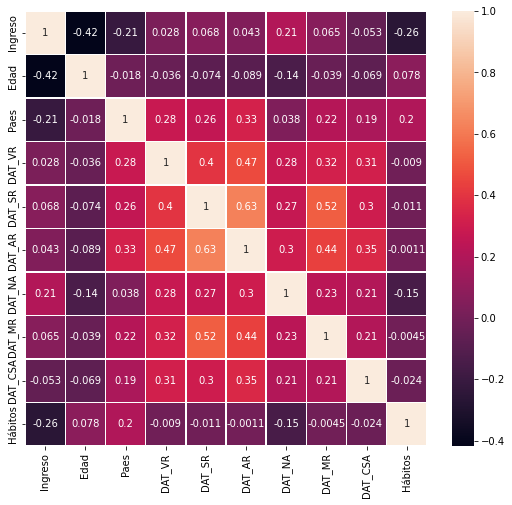

In [17]:
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=.5)

plt.show()

Las variables que influiran más en el resultado deberían de ser las aptitudes, especificamente DAT_AR(Razonamiento no verbal, interpretación de planos o diagramas o instrucciones) y DAT_SR (Razonamiento espacial, percepción de las dimensiones y objetos), independientemente de la carrera que vaya a estudiar.

Un dato curioso es que los malos hábitos no tienen una correlación fuerte con niguna de las otras variables.

####****Verificación de normalidad****
Se verificó el supuesto de normalidad para las variables numéricas con el objetivo de determinar el tipo de preprocesamiento más adecuado en dependencia de si se cumple o no con la normalidad.

In [18]:
from scipy import stats
num_cols = datos.select_dtypes(include=["int64","float64"]).columns.to_list()

for i in num_cols:
  result = stats.anderson(datos[i])
  print('Variable: ', i,' - Estadistico: %.3f' % result.statistic)
  p = 0
  sl, cv = result.significance_level[2], result.critical_values[2]
  if result.statistic < result.critical_values[2]:
    print('%.3f: %.3f, data es normal (no se rechaza H0)' % (sl, cv))
  else:
    print('%.3f: %.3f, data no es normal (se rechaza H0)' % (sl, cv))

Variable:  Ingreso  - Estadistico: 219.061
5.000: 0.786, data no es normal (se rechaza H0)
Variable:  Edad  - Estadistico: 280.571
5.000: 0.786, data no es normal (se rechaza H0)
Variable:  Paes  - Estadistico: 359.107
5.000: 0.786, data no es normal (se rechaza H0)
Variable:  DAT_VR  - Estadistico: 170.554
5.000: 0.786, data no es normal (se rechaza H0)
Variable:  DAT_SR  - Estadistico: 228.661
5.000: 0.786, data no es normal (se rechaza H0)
Variable:  DAT_AR  - Estadistico: 101.775
5.000: 0.786, data no es normal (se rechaza H0)
Variable:  DAT_NA  - Estadistico: 124.573
5.000: 0.786, data no es normal (se rechaza H0)
Variable:  DAT_MR  - Estadistico: 84.010
5.000: 0.786, data no es normal (se rechaza H0)
Variable:  DAT_CSA  - Estadistico: 226.244
5.000: 0.786, data no es normal (se rechaza H0)
Variable:  Hábitos  - Estadistico: 88.350
5.000: 0.786, data no es normal (se rechaza H0)


En este caso todas las variables númericas resultaron no estar normalizadas, por lo que se hace necesario realizar un preprocesado que solvente este detalle (ver apartado de preprocesamiento).

###**División del dataframe**
Se realizó la división del dataset, con un equivalente al 25% de datos para prueba, y el resto para entrenamiento.

In [19]:
#Separacion de dataset en x/y
y = datos['Aprobacion']
x = datos.drop(columns='Aprobacion')

#Importar funcion requerida
from sklearn.model_selection import train_test_split

#Dividir dataset en datos para prueba y ajuste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Como resultado, la estructura de los dataset divididos es la mostrada a continuación, en la que los subgrupos de entrenamiento y prueba corresponden al 75% (4494 observaciones) y 25% (1498 observaciones):

In [20]:
x_train.shape

(4494, 15)

In [21]:
x_test.shape

(1498, 15)

In [22]:
y_train.shape

(4494,)

In [23]:
y_test.shape

(1498,)

###**Preprocesamiento**
Se hace necesario realizar transformaciones al dataset dependiendo del tipo de dato de cada variable. Debido a que no se cumple el supuesto de normalidad, se implementa una normalización con MinMaxScaler sobre las variables numéricas. También se incluye One-Hot encoding con las variables categóricas.

In [24]:
#Importar clases necesarias
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Separacion de columnas categoricas, normales y no normales
cat_cols = x.select_dtypes(include="object").columns.to_list()
num_cols = x.select_dtypes(include=["int64","float64"]).columns.to_list()

#Implementación de transformer
Transformer = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown="ignore", sparse=False), cat_cols),
                                 ('normalizer', MinMaxScaler(), num_cols)],
                                remainder = 'passthrough')

#Aplicando transformer a los datasets de train y test
Transformer.fit(x_train)
x_train_trans = Transformer.transform(x_train)
x_test_trans = Transformer.transform(x_test)

#Se obtienen las etiquetas de columnas para crear el dataframe
labels = Transformer.get_feature_names_out()

#Se conforman los dataframe una vez transformados
x_train_trans = pd.DataFrame(x_train_trans,columns = labels)
x_test_trans = pd.DataFrame(x_test_trans,columns = labels)

###**Árbol de decisión**

####****Creación del modelo****
Se genera una instancia del algoritmo de arbol de decisión, se crea el modelo y se configura utilizando los hiperpárametros por defecto. 

Durante la realización del experimento, se probaron varios hiperparámetros de configuración, y se dejó aquellos que daban los mejores resultados de accuracy según las métricas del modelo. 

El ajuste del modelo se realiza tomando en cuenta la Aprobacion como variable objetivo, y el resto de variables procesadas con el Transformer, como vector de entrada.

In [25]:
#Importar la clase del modelo
from sklearn.tree import DecisionTreeClassifier

#Instanciar el modelo y ajustar con los datos de entrenamiento
modelo_AD = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5)
modelo_AD.fit(x_train_trans, y_train)

#Prediccion del modelo sobre test dataframe
y_pred_AD = modelo_AD.predict(x_test_trans)

####****Evaluación del modelo****
Algunas métricas clave del algoritmo serán evaluadas, con el objetivo de evaluar el desempeño del mismo.

In [26]:
import sklearn.metrics as metrics

#Obtener metricas de desempeño
reporte = metrics.classification_report(y_test, y_pred_AD)
print(reporte)

              precision    recall  f1-score   support

    Aprobado       0.79      0.86      0.83      1015
   Reprobado       0.65      0.53      0.58       483

    accuracy                           0.76      1498
   macro avg       0.72      0.70      0.71      1498
weighted avg       0.75      0.76      0.75      1498



El modelo genera valores similares, tanto de precisión como de recall, y estos denotan que se tiene mejores resultados para aprobados que para reprobados, lo que puede deberse a la proporción de 2:1 que se tiene de ambas clases (diferente proporcion en datos de entrenamiento). Esto lo confirma la matriz de confusión de la siguiente figura.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



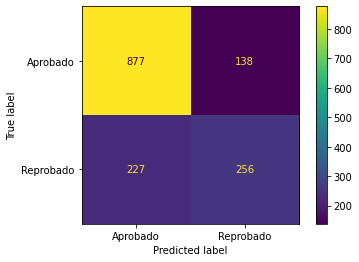

In [27]:
metrics.plot_confusion_matrix(modelo_AD, x_test_trans, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



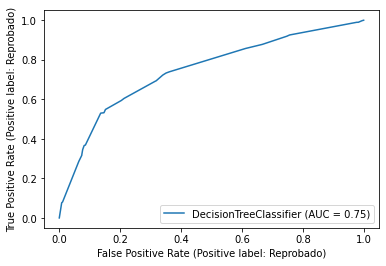

In [28]:
metrics.plot_roc_curve(modelo_AD, x_test_trans, y_test)

La curva ROC, de este arbol de decisión nos muestra que tiene un 75% de capacidad discriminativa y que es mejor discriminando los Aprobados que los reprobados.

####****Importancia de variables****
Se calculó el ranking de importancia que las variables preprocesadas tienen en la clasificación con el modelo de Arbol de decisión. 

In [29]:
print("Importancia de las variables en el modelo AD")
importancia_variables_AD = pd.DataFrame({'variable': labels.tolist(),
                                      'importancia': modelo_AD.feature_importances_})
importancia_variables_AD.sort_values('importancia', ascending=False)

Importancia de las variables en el modelo AD


,variable,importancia
201,normalizer__Paes,0.441862
195,onehot__Facultad_Facultad de Ingenieria,0.194717
156,onehot__Carrera_Ingeniería en Aeronáutica,0.188178
200,normalizer__Edad,0.037034
203,normalizer__DAT_SR,0.028312
...,...,...
73,onehot__Municipio_Oratorio de Concepción,0.000000
74,onehot__Municipio_Panchimalco,0.000000
75,onehot__Municipio_Poloros,0.000000
76,onehot__Municipio_Puerto El Triunfo,0.000000


Es interesante mencionar que la variable PAES reporta casi un 45% de importancia para el modelo, siendo la más relevante. Cabe señalar que las 209 variables evaluadas se generan debido al preprocesamiento del OneHot Encoder sobre las variables categóricas. 

Hay varias variables, todas relacionadas con Municipio, que no tienen ninguna relevancia para el modelo y podrían ser eliminadas.

###**Random forest**

####****Creación del modelo****
Se genera una instancia del algoritmo de random forest, se crea el modelo y se configura utilizando los hiperpárametros por defecto. Al igual que con el Arbol de decisión, se probaron varias configuraciones de hiperparámetros, dejando configuradas las que brindaron mejor resultado.

In [30]:
from os import defpath
#Importar la clase del modelo
from sklearn.ensemble import RandomForestClassifier

#Instanciar el modelo y ajustar con los datos de entrenamiento
modelo_RF = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth = 25)
modelo_RF.fit(x_train_trans, y_train)

#Prediccion del modelo sobre test dataframe
y_pred_RF = modelo_RF.predict(x_test_trans)

####****Evaluación del modelo****
Algunas métricas clave del algoritmo serán evaluadas, con el objetivo de evaluar el desempeño del mismo.

In [31]:
#Obtener metricas de desempeño
reporte = metrics.classification_report(y_test, y_pred_RF)
print(reporte)

              precision    recall  f1-score   support

    Aprobado       0.76      0.92      0.83      1015
   Reprobado       0.69      0.39      0.50       483

    accuracy                           0.75      1498
   macro avg       0.73      0.65      0.67      1498
weighted avg       0.74      0.75      0.72      1498



Haciendo un comparativo, con Random Forest no mejora la clasificación, sin embargo el Arbol de Decisión presenta una segregación más pareja entre las clases.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



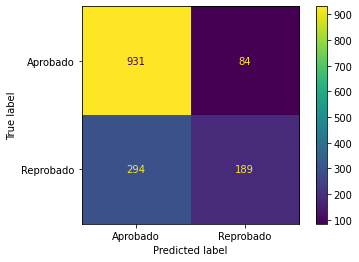

In [32]:
metrics.plot_confusion_matrix(modelo_RF, x_test_trans, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



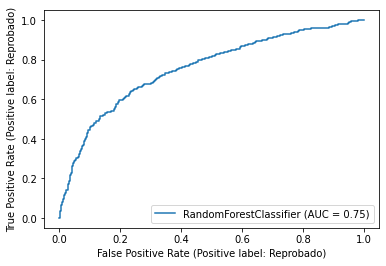

In [33]:
metrics.plot_roc_curve(modelo_RF, x_test_trans, y_test)

Segun la curva ROC para Random Forest, se tiene una AUC de 0.75, que significa una mejora de discriminación, esto principalmente porque mejora la discriminación de Verdaderos positivos. Las curvas ROC de ambos modelos presentan un comportamiento muy similar, presentando Random Forest una ligera mejoría.

####****Importancia de variables****
Se calculó el ranking de importancia que las variables preprocesadas tienen en la clasificación con el modelo de Random Forest.

In [34]:
print("Importancia de las variables en el modelo RF")
importancia_variables_RF = pd.DataFrame({'variable': labels.tolist(),
                                      'importancia': modelo_RF.feature_importances_})
importancia_variables_RF.sort_values('importancia', ascending=False)

Importancia de las variables en el modelo RF


,variable,importancia
201,normalizer__Paes,1.137485e-01
204,normalizer__DAT_AR,6.151976e-02
203,normalizer__DAT_SR,6.016782e-02
205,normalizer__DAT_NA,5.998446e-02
206,normalizer__DAT_MR,5.959371e-02
...,...,...
86,onehot__Municipio_San Francisco Chinameca,7.744603e-06
121,onehot__Municipio_Santa Rita,3.610419e-06
31,onehot__Municipio_Cítala,1.877412e-06
120,onehot__Municipio_Santa Maria Ostuma,1.438045e-06


La principal variable del modelo corresponde a Paes, al igual que en Arbol de decisión. También se incorpora mayor influencia de las aptitudes en este modelo. Pero, a diferencia del anterior modelo, Random Forest brinda un peso más distribuido a todas las variables, esto es, no hay variables que no ejerzan influencia en la clasificación.

##**Conclusiones**

*   Se detecto que 5 Variables no presentaban ninguna información relevante para la clasificación.Por lo que fueron eliminadas del Dataframe(Estado, Estado_actual,CUM,Avance, Segunda_carrera).
*   La base de datos ya estaba bastante depurada, solo fue necesario tratar la Variable "Segunda_carrera" que presentaba 5222 valores vacios, debido a que los estudiantes no completan dicha opción, y el tratamiento fue simplemente anularla, ya que no representaba información suficiente, para que fuera relevante.
*   Se tiene más casos de Aprobados que de Reprobados, lo que influencia en el clasificador, aunque mantiene un porcentaje alto de coincidencia(AUC= 0.75).
*   Según la matriz de correlación, las variables que aportan más en el resultado son las aptitudes: DAT_AR(Razonamiento no verbal, interpretación de planos o diagramas o instrucciones) y DAT_SR (Razonamiento espacial, percepción de las dimensiones y objetos), independientemente de la carrera que vaya a estudiar. Sin embargo, esta observación exploratoria cambia de sentido al evaluar la importancia de las variables en el modelo de predicción.
*   Se aplicó el estadístico Anderson-Darling, para determinar si las variables numéricas estaban normalizadas y se determino que había que realizar ajustes, por lo que se aplico el preprocesado con ColumnTransformer aplicando OneHotEncoder y MinMaxScaler, para solventar este impase.
*   Se realizaron 3 pruebas de modelos: Arbol de decisión, Random Forest y Extra Tree Classifier. En el desarrollo de este reporte se consideró no necesario mostrar el análisis de Extra Trees Classifier, ya que su desempeño fue muy inferior al resto.
*   Ambos modelos tienen métricas de desempeño muy similares:
  *   El árbol de decisión prueba ser un modelo ligeramente más estable ya que sus indicadores (precision, recall) tienes menos diferencia entre las clases, o sea, tiene un menor sesgo. Sin embargo la curva AOC tiene una forma más escalonada, lo que sugiere límites de clasificación menos definidos. Adicional, la nula importancia observada en algunas variables motiva a realizar más procesos de limpieza/transformación/selección en el vector de entrada. 
  *   El Random Forest presenta más sesgo, ya que los resultados de precision y recall son más distantes entre las clases. A pesar de eso, el accuracy global varía apenas en 1%. La curva ROC es más definida, y todas las variables de entrada obtienen cierto grado de influencia en la clasificación (aunque algunos son muy bajos).
  *   En ambos modelos considerados, la Variable PAES fue de mayor influencia. Es importante notar la relevancia de esta variable a la población estudiantil, dado que es un buen indicador de su posible éxito académico.
*  Desde la perspectiva técnica, el modelo con mejor desempeño es el Arbol de decisión, sin embargo, es muy probable que se prefiera Random Forest bajo la consideración académica de la influenca que representan las aptitudes en el desempeño estudiantil. Una implementación de este modelo en producción posiblemente requiera un reentrenamiento con una muestra que reduzca la proporción 2:1 actual de la variable objetivo, para que las clases sean mas parejas y el sesgo actual se reduzca.
*  Se sugiere que para incrementar el espacio muestral, se busque maximizar la cantidad de estudiantes que se someten a la prueba psicométrica, ya que la muestra utilizada para el experimento ya había sido reducida por el personal universitario para eliminar aquellos registros con valores faltantes.